# Deep Learning Fundamentals: Lectures 61-65

This notebook covers key concepts from Lectures 61 to 65, focusing on building, training, evaluating, and regularizing a feedforward neural network (FFNN) for classification using Keras and TensorFlow. The topics include:

- **Lecture 61**: Creating a basic FFNN for classification
- **Lecture 62**: Activation functions (ReLU, Sigmoid, Softmax) and their roles
- **Lecture 63**: Training neural networks (optimizers, loss functions, backpropagation)
- **Lecture 64**: Evaluating deep learning models (accuracy, loss, validation)
- **Lecture 65**: Regularization techniques (Dropout, early stopping, L2 regularization)

We'll use a synthetic binary classification dataset to demonstrate these concepts.

## Setup and Imports

Let's import the necessary libraries and set up the environment for reproducibility.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Lecture 61: Creating a Basic Feedforward Neural Network for Classification

We'll create a synthetic dataset and build a basic FFNN for binary classification. The model will have:
- Input layer (20 features)
- Two hidden layers with ReLU activation
- Output layer with sigmoid activation for binary classification

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (800, 20)
Testing data shape: (200, 20)


In [3]:

# Define the FFNN model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(20,), kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create model
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

## Lecture 62: Activation Functions in Neural Networks

Activation functions introduce non-linearity to neural networks, enabling them to learn complex patterns. Common activation functions include:

- **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)`
  - Pros: Accelerates convergence, computationally efficient
  - Cons: Can suffer from 'dying ReLU' problem (neurons output 0 for all inputs)
  - Used in hidden layers for non-linearity
- **Sigmoid**: `f(x) = 1 / (1 + e^-x)`
  - Pros: Outputs values between 0 and 1, ideal for binary classification
  - Cons: Vanishing gradient problem, not zero-centered
  - Used in output layer for binary classification
- **Softmax**: Generalizes sigmoid for multi-class classification
  - Pros: Outputs probabilities summing to 1
  - Cons: Computationally expensive for many classes
  - Used in output layer for multi-class classification

In our model, we use ReLU for hidden layers and sigmoid for the output layer.

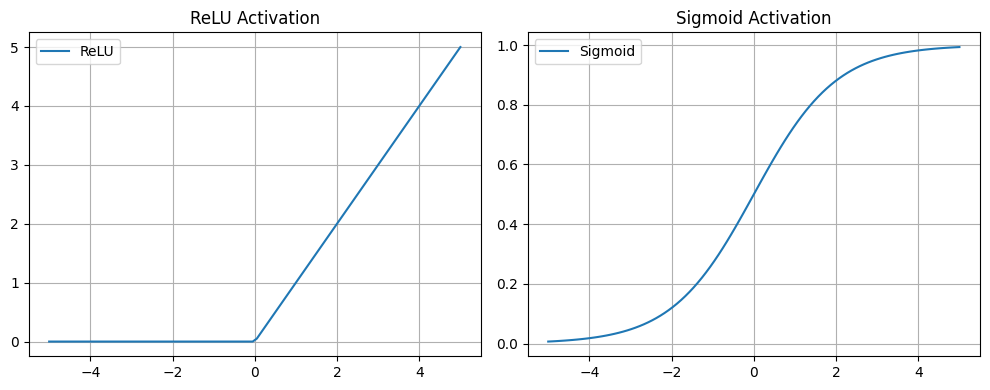

In [4]:
# Visualize activation functions
x = np.linspace(-5, 5, 100)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, relu, label='ReLU')
plt.title('ReLU Activation')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid, label='Sigmoid')
plt.title('Sigmoid Activation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('activation_functions.png')

## Lecture 63: Training Neural Networks

Training involves optimizing the model's weights to minimize a loss function using an optimizer and backpropagation:

- **Optimizers**:
  - **SGD (Stochastic Gradient Descent)**: Updates weights using the gradient of the loss function
    - Pros: Simple, effective for large datasets
    - Cons: Can be slow, sensitive to learning rate
  - **Adam**: Combines adaptive learning rates with momentum
    - Pros: Fast convergence, robust to hyperparameters
    - Cons: May overfit on small datasets
- **Loss Functions**:
  - Binary Crossentropy: Used for binary classification, measures difference between predicted and actual probabilities
- **Backpropagation**: Computes gradients of the loss function with respect to weights, propagating errors backward

We'll use Adam optimizer and binary crossentropy loss.

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [6]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4382 - loss: 1.5193 - val_accuracy: 0.6313 - val_loss: 1.3174
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6323 - loss: 1.2776 - val_accuracy: 0.7937 - val_loss: 1.1675
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7281 - loss: 1.1491 - val_accuracy: 0.8000 - val_loss: 1.0566
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7776 - loss: 1.0650 - val_accuracy: 0.8125 - val_loss: 0.9646
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7919 - loss: 0.9875 - val_accuracy: 0.8438 - val_loss: 0.8865
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8218 - loss: 0.9176 - val_accuracy: 0.8625 - val_loss: 0.8173
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8463 - loss: 0.8432 - val_accuracy: 0.9000 - val_loss: 0.7602
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8572 - loss: 0.8053 - val_accuracy: 0.8875 - 

## Lecture 64: Evaluating Deep Learning Models

Model evaluation involves assessing performance on unseen data using metrics like:
- **Accuracy**: Proportion of correct predictions
- **Loss**: Value of the loss function on test data
- **Validation Sets**: Used during training to monitor generalization

We'll evaluate the model on the test set and visualize training/validation metrics.

Test accuracy: 0.8500
Test loss: 0.4429


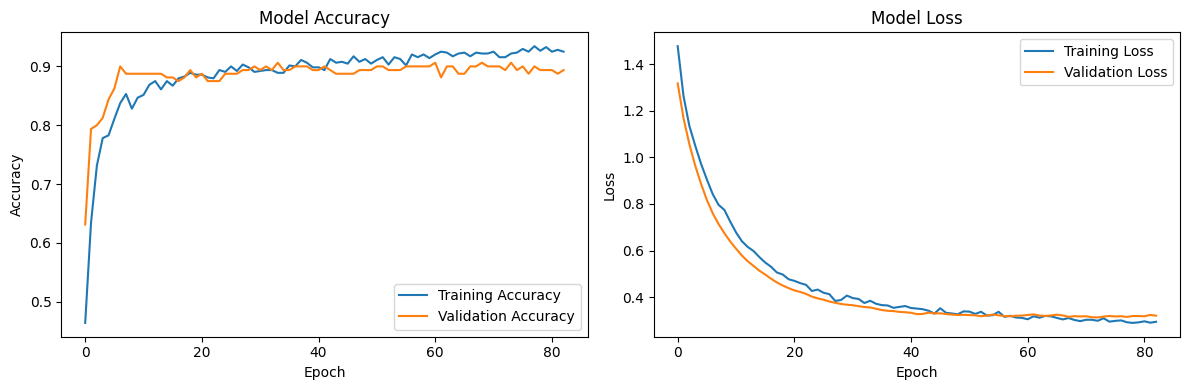

In [7]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')

## Lecture 65: Regularization Techniques in Deep Learning

Regularization prevents overfitting by adding constraints to the model:

- **Dropout**: Randomly sets a fraction of neurons to zero during training
  - Pros: Reduces reliance on specific neurons, improves generalization
  - Cons: Increases training time
- **Early Stopping**: Stops training when validation performance stops improving
  - Pros: Prevents overfitting, saves computation
  - Cons: May stop too early if patience is too low
- **L2 Regularization**: Adds a penalty on the size of weights to the loss function
  - Pros: Encourages smaller weights, reduces model complexity
  - Cons: May underfit if regularization is too strong

Our model includes Dropout (30% rate) and L2 regularization (0.01) in the hidden layers, and early stopping during training.

In [8]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Show example predictions
print("\nExample Predictions:")
for i in range(5):
    print(f"Sample {i+1}: Predicted={predicted_classes[i]}, Actual={y_test[i]}, Probability={predictions[i][0]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Example Predictions:
Sample 1: Predicted=1, Actual=1, Probability=0.6626
Sample 2: Predicted=1, Actual=1, Probability=0.5906
Sample 3: Predicted=1, Actual=1, Probability=0.7454
Sample 4: Predicted=1, Actual=1, Probability=0.8994
Sample 5: Predicted=1, Actual=1, Probability=0.9584


## Summary

- **Lecture 61**: Built a basic FFNN with two hidden layers for binary classification.
- **Lecture 62**: Used ReLU for hidden layers (non-linearity) and sigmoid for the output (binary classification).
- **Lecture 63**: Trained with Adam optimizer and binary crossentropy loss, leveraging backpropagation.
- **Lecture 64**: Evaluated model performance using accuracy and loss, visualized training history.
- **Lecture 65**: Applied Dropout, L2 regularization, and early stopping to prevent overfitting.

This notebook provides a foundation for deep learning. To extend this work, consider:
- Experimenting with different architectures (more layers, different neuron counts)
- Tuning hyperparameters (learning rate, dropout rate, L2 penalty)
- Using cross-validation for robust evaluation
- Applying these concepts to real-world datasets